In [1]:
#LOAD LIBRARIES

In [2]:
# loading the required libraries 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
from geopy.distance import geodesic
from geopy.distance import great_circle
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from patsy import dmatrices
%matplotlib inline 

In [3]:
#libraries used for modelling and evaluation part
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [4]:
#pip install xgboost

In [5]:
#for model improvement
from xgboost import XGBRegressor
import xgboost as xgb

In [6]:
#set working directory
os.chdir("C:/Users/NANINE/Desktop/EdWisor/PROJECT2")

In [7]:
#read the dataset

In [8]:
cab_train = pd.read_csv('train_cab.csv',dtype={'fare_amount':np.float64},na_values={'fare_amount':'430-'})
cab_test = pd.read_csv('test.csv')
data=[cab_train,cab_test]
for i in data:
    i['pickup_datetime']  = pd.to_datetime(i['pickup_datetime'],errors='coerce')
cab_train.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0


In [9]:
#STEPS FOR EXPLORATORY DATA ANALYSIS(EDA)
#1) variable identification
#2) univariate analysis
#3) bivariate analysis
#4) outlier treatment
#5) missing value treatment
#6) feature selection
#7) feature scaling
#8) feature engineering(variable transformation/scaling, variable creation/dummy variables)

In [10]:
#1) variable identification

In [11]:
cab_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
fare_amount          16042 non-null float64
pickup_datetime      16066 non-null datetime64[ns, UTC]
pickup_longitude     16067 non-null float64
pickup_latitude      16067 non-null float64
dropoff_longitude    16067 non-null float64
dropoff_latitude     16067 non-null float64
passenger_count      16012 non-null float64
dtypes: datetime64[ns, UTC](1), float64(6)
memory usage: 878.8 KB


In [12]:
cab_train.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                  float64
dtype: object

In [13]:
cab_train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0


In [14]:
cab_train.shape

(16067, 7)

In [15]:
cab_test.head(5)

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1


In [16]:
cab_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 6 columns):
pickup_datetime      9914 non-null datetime64[ns, UTC]
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
dtypes: datetime64[ns, UTC](1), float64(4), int64(1)
memory usage: 464.8 KB


In [17]:
cab_test.dtypes

pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [18]:
cab_test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [19]:
cab_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16042.000000,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,15.015004,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,430.460945,10.578384,6.826587,10.575062,6.187087,60.844122
min,-3.000000,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,6.000000,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,8.500000,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,12.500000,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,54343.000000,40.766125,401.083332,40.802437,41.366138,5345.000000


In [20]:
#we will convert passenger_count into a categorical variable because passenger_count is not a continuous variable.
#passenger_count cannot take continous values. and also they are limited in number if its a cab.

In [21]:
cat_var=['passenger_count']
num_var=['fare_amount','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']

In [22]:
#2) univariate analysis

In [23]:
# setting up the sns for plots
sns.set(style='darkgrid',palette='Set1')

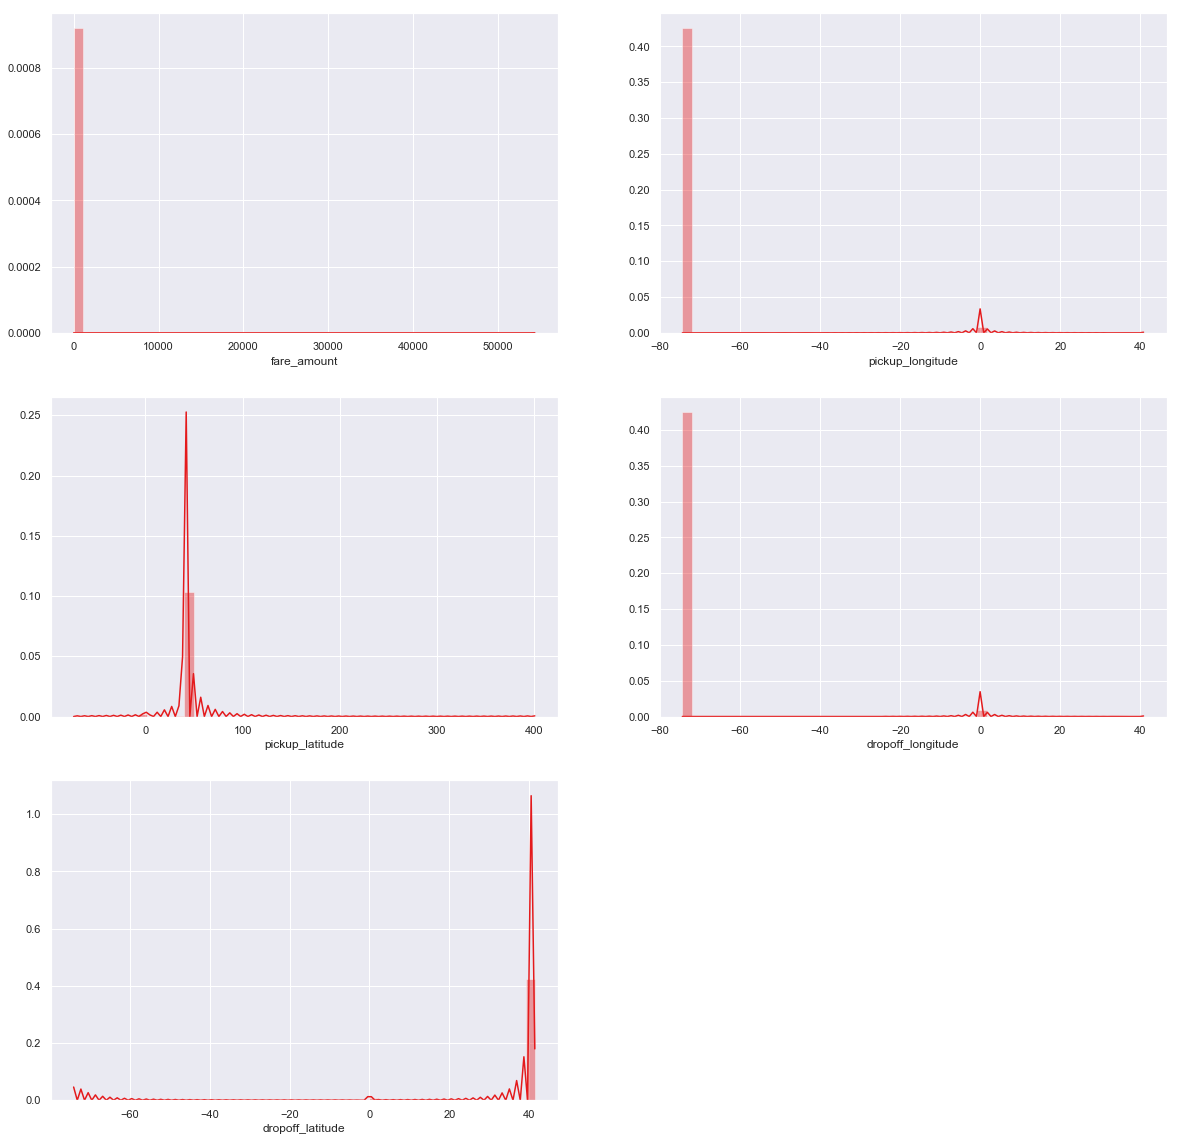

In [24]:
plt.figure(figsize=(20,20))
plt.subplot(321)
sns.distplot(cab_train['fare_amount'],bins=50)
plt.subplot(322)
sns.distplot(cab_train['pickup_longitude'],bins=50)
plt.subplot(323)
sns.distplot(cab_train['pickup_latitude'],bins=50)
plt.subplot(324)
sns.distplot(cab_train['dropoff_longitude'],bins=50)
plt.subplot(325)
sns.distplot(cab_train['dropoff_latitude'],bins=50)
plt.show()

In [25]:
#3) bivariate analysis

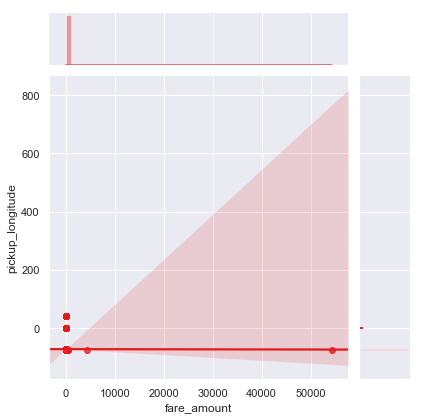

In [26]:
sns.jointplot(x='fare_amount',y='pickup_longitude',data=cab_train,kind = 'reg')
plt.show()

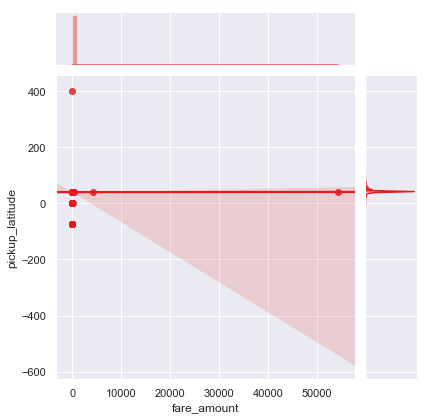

In [27]:
sns.jointplot(x='fare_amount',y='pickup_latitude',data=cab_train,kind = 'reg')
plt.show()

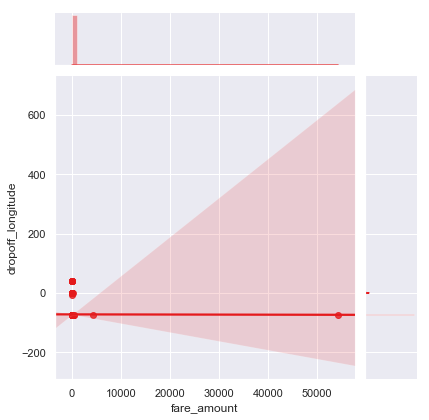

In [28]:
sns.jointplot(x='fare_amount',y='dropoff_longitude',data=cab_train,kind = 'reg')
plt.show()

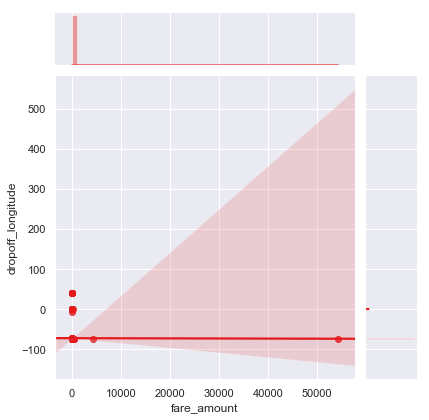

In [29]:
sns.jointplot(x='fare_amount',y='dropoff_longitude',data=cab_train,kind = 'reg')
plt.show()

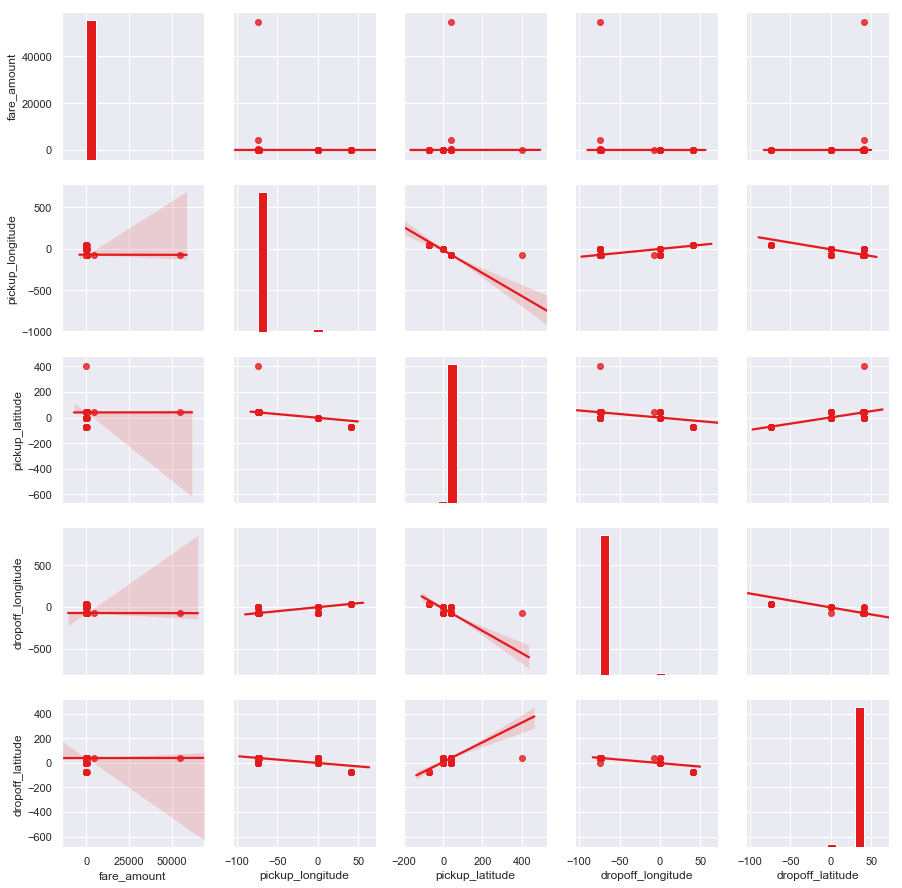

In [30]:
sns.pairplot(data=cab_train[num_var],kind='reg',dropna=True)
plt.show()

In [31]:
# 4) outlier analysis
#Removing values which are not within desired range(outlier) depending upon basic understanding of dataset.
#1.Fare amount has a negative value, which doesn't make sense. A price amount cannot be -ve ,So we will remove these fields.

In [32]:
sum(cab_train['fare_amount']<0)

3

In [33]:
cab_train[cab_train['fare_amount']<0]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2039,-2.9,2010-03-09 23:37:10+00:00,-73.789450,40.643498,-73.788665,40.641952,1.0
2486,-2.5,2015-03-22 05:14:27+00:00,-74.000031,40.720631,-73.999809,40.720539,1.0
13032,-3.0,2013-08-30 08:57:10+00:00,-73.995062,40.740755,-73.995885,40.741357,4.0


In [34]:
cab_train = cab_train.drop(cab_train[cab_train['fare_amount']<0].index, axis=0)

In [35]:
#2.Passenger_count variable (should be between 1 to 6 max)

In [36]:
sum(cab_train['passenger_count']>6)

20

In [37]:
sum(cab_train['passenger_count']<1)

58

In [38]:
cab_train['passenger_count'].unique()

array([1.000e+00, 2.000e+00, 3.000e+00,       nan, 6.000e+00, 5.000e+00,
       4.000e+00, 2.360e+02, 4.560e+02, 5.334e+03, 0.000e+00, 5.350e+02,
       3.540e+02, 5.500e+01, 5.540e+02, 5.300e+01, 3.500e+01, 3.450e+02,
       5.345e+03, 5.360e+02, 4.300e+01, 5.800e+01, 5.370e+02, 8.700e+01,
       5.312e+02, 1.300e+00, 1.200e-01, 5.570e+02])

In [39]:
cab_test['passenger_count'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [40]:
#We will remove 79 observation which are above 6 ,below 1 and decimal values because a cab cannot hold these number of 
#passengers.

In [41]:
cab_train = cab_train.drop(cab_train[cab_train['passenger_count']>6].index, axis=0)
cab_train = cab_train.drop(cab_train[cab_train['passenger_count']<1].index, axis=0)
cab_train = cab_train.drop(cab_train[cab_train['passenger_count']==1.3].index, axis=0)

In [42]:
cab_train['passenger_count'].unique()

array([ 1.,  2.,  3., nan,  6.,  5.,  4.])

In [43]:
sum(cab_train['passenger_count']>6)

0

In [44]:
sum(cab_train['passenger_count']<1)

0

In [45]:
#3.Latitudes range from -90 to 90.Longitudes range from -180 to 180. Removing which does not satisfy these ranges

In [46]:
print('pickup_longitude above 180={}'.format(sum(cab_train['pickup_longitude']>180)))
print('pickup_longitude below -180={}'.format(sum(cab_train['pickup_longitude']<-180)))
print('pickup_latitude above 90={}'.format(sum(cab_train['pickup_latitude']>90)))
print('pickup_latitude below -90={}'.format(sum(cab_train['pickup_latitude']<-90)))
print('dropoff_longitude above 180={}'.format(sum(cab_train['dropoff_longitude']>180)))
print('dropoff_longitude below -180={}'.format(sum(cab_train['dropoff_longitude']<-180)))
print('dropoff_latitude below -90={}'.format(sum(cab_train['dropoff_latitude']<-90)))
print('dropoff_latitude above 90={}'.format(sum(cab_train['dropoff_latitude']>90)))

pickup_longitude above 180=0
pickup_longitude below -180=0
pickup_latitude above 90=1
pickup_latitude below -90=0
dropoff_longitude above 180=0
dropoff_longitude below -180=0
dropoff_latitude below -90=0
dropoff_latitude above 90=0


In [47]:
for i in ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']:
    print(i,'equal to 0={}'.format(sum(cab_train[i]==0)))

pickup_longitude equal to 0=311
pickup_latitude equal to 0=311
dropoff_longitude equal to 0=312
dropoff_latitude equal to 0=310


In [48]:
#remove the outliers like for pickup_lat>90 and values=0

In [49]:
cab_train = cab_train.drop(cab_train[cab_train['pickup_latitude']>90].index, axis=0)
for i in ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']:
    cab_train = cab_train.drop(cab_train[cab_train[i]==0].index, axis=0)

In [50]:
cab_train.shape

(15662, 7)

In [51]:
#So, we lossed 16067-15662=405 observations because of irrelevant values.

In [52]:
#Create dataframe with number of missing value
missing_val = pd.DataFrame(cab_train.isnull().sum())
#Reset index
missing_val = missing_val.reset_index()
missing_val

,index,0
0,fare_amount,22
1,pickup_datetime,1
2,pickup_longitude,0
3,pickup_latitude,0
4,dropoff_longitude,0
5,dropoff_latitude,0
6,passenger_count,55


In [53]:
cab_train['fare_amount'] = cab_train['fare_amount'].fillna(cab_train['fare_amount'].median())

In [54]:
#before missing value analysis lets do outlier analysis

In [55]:
#Outlier Analysis using Boxplot #We Will do Outlier Analysis only on Fare_amount just for now and we will do outlier analysis
#after feature engineering laitudes and longitudes.

In [56]:
cab_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,15662.000000,15662.000000,15662.000000,15662.000000,15662.000000,15607.000000
mean,15.106587,-73.911515,40.689718,-73.906318,40.687657,1.650477
std,435.648087,2.658966,2.613222,2.710749,2.632316,1.266044
min,0.000000,-74.438233,-74.006893,-74.429332,-74.006377,1.000000
25%,6.000000,-73.992390,40.736534,-73.991369,40.736287,1.000000
50%,8.500000,-73.982049,40.753300,-73.980552,40.754238,1.000000
75%,12.500000,-73.968078,40.767805,-73.965356,40.768311,2.000000
max,54343.000000,40.766125,41.366138,40.802437,41.366138,6.000000


In [57]:
cab_test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


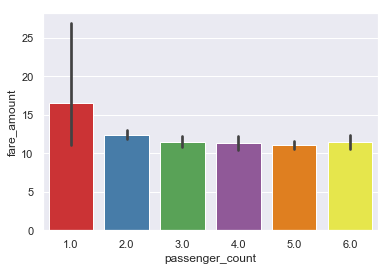

In [58]:
sns.barplot(x='passenger_count',y='fare_amount',data=cab_train)

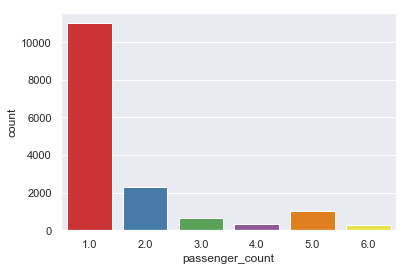

In [59]:
sns.countplot(x='passenger_count',data=cab_train)

In [60]:
#Univariate Boxplots: Boxplots for  target variable.

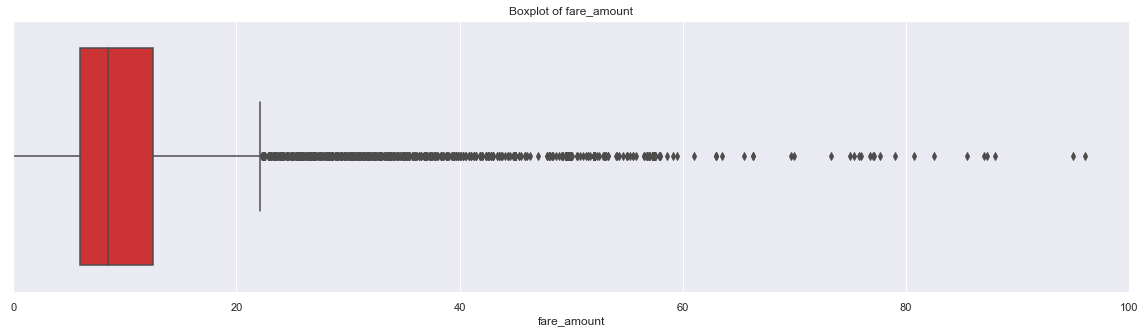

In [61]:
plt.figure(figsize=(20,5)) 
plt.xlim(0,100)
sns.boxplot(x=cab_train['fare_amount'],data=cab_train,orient='h')
plt.title('Boxplot of fare_amount')
plt.show()

In [62]:
#Bivariate Boxplots: Boxplot for Numerical Variable Vs Categorical Variable.

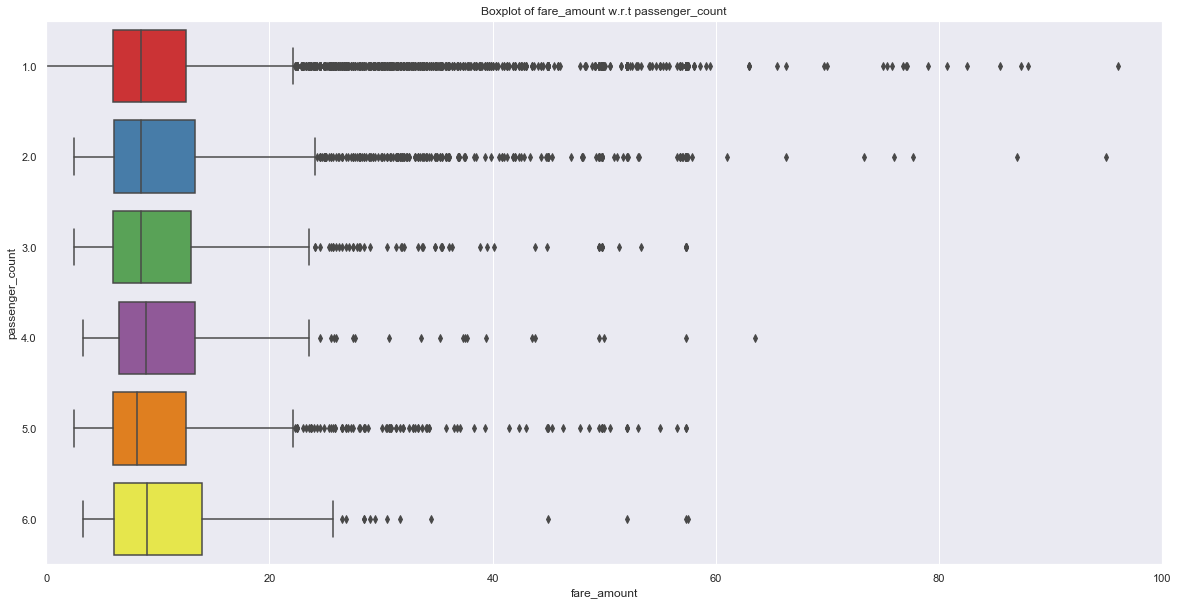

In [63]:
plt.figure(figsize=(20,10))
plt.xlim(0,100)
sns.boxplot(x=cab_train['fare_amount'],y=cab_train['passenger_count'],data=cab_train,orient='h')
plt.title('Boxplot of fare_amount w.r.t passenger_count')
# plt.savefig('Boxplot of fare_amount w.r.t passenger_count.png')
plt.show()

In [64]:
pd.DataFrame(cab_train.isnull().sum())

,0
fare_amount,0
pickup_datetime,1
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,55


In [65]:
def outlier_treatment(col):
    ''' calculating outlier indices and replacing them with NA  '''
    #Extract quartiles
    q75, q25 = np.percentile(cab_train[col], [75 ,25])
    print(q75,q25) 
    #Calculate IQR
    iqr = q75 - q25
    #Calculate inner and outer fence
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    print(minimum,maximum)
     #Replace with NA
    cab_train.loc[cab_train[col] < minimum,col] = np.nan
    cab_train.loc[cab_train[col] > maximum,col] = np.nan

In [66]:
outlier_treatment('fare_amount')

12.5 6.0
-3.75 22.25


In [67]:
cab_train['fare_amount'].describe()

count    14304.000000
mean         8.912588
std          4.133558
min          0.000000
25%          5.700000
50%          8.000000
75%         11.000000
max         22.100000
Name: fare_amount, dtype: float64

In [68]:
pd.DataFrame(cab_train.isnull().sum())

,0
fare_amount,1358
pickup_datetime,1
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,55


In [69]:
#check for the best method to fill mising values (mean,median,mode)

In [70]:
# Choosing a random values to replace it as NA
a=cab_train['fare_amount'].loc[1000]
print('fare_amount at loc-1000:{}'.format(a))
# Replacing 1 value with NA
cab_train['fare_amount'].loc[1000] = np.nan
print('Value after replacing with nan:{}'.format(cab_train['fare_amount'].loc[1000]))
# Impute with mean
print('Value if imputed with mean:{}'.format(cab_train['fare_amount'].fillna(cab_train['fare_amount'].mean()).loc[1000]))
# Impute with median
print('Value if imputed with median:{}'.format(cab_train['fare_amount'].fillna(cab_train['fare_amount'].median()).loc[1000]))

fare_amount at loc-1000:7.0
Value after replacing with nan:nan
Value if imputed with mean:8.912721806614034
Value if imputed with median:8.0


In [71]:
#we can see median imputation is best here so lets impute the missing value with median

In [72]:
cab_train['fare_amount'] = cab_train['fare_amount'].fillna(cab_train['fare_amount'].median())

In [73]:
cab_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,15662.000000,15662.000000,15662.000000,15662.000000,15662.000000,15607.000000
mean,8.833524,-73.911515,40.689718,-73.906318,40.687657,1.650477
std,3.958597,2.658966,2.613222,2.710749,2.632316,1.266044
min,0.000000,-74.438233,-74.006893,-74.429332,-74.006377,1.000000
25%,6.000000,-73.992390,40.736534,-73.991369,40.736287,1.000000
50%,8.000000,-73.982049,40.753300,-73.980552,40.754238,1.000000
75%,10.500000,-73.968078,40.767805,-73.965356,40.768311,2.000000
max,22.100000,40.766125,41.366138,40.802437,41.366138,6.000000


In [74]:
cab_train['passenger_count'] = cab_train['passenger_count'].fillna(cab_train['passenger_count'].median())

In [75]:
cab_train['passenger_count'].unique()

array([1., 2., 3., 6., 5., 4.])

In [76]:
pd.DataFrame(cab_train.isnull().sum())

,0
fare_amount,0
pickup_datetime,1
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


In [77]:
cab_train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0


In [78]:
cab_train=cab_train.dropna()

In [79]:
pd.DataFrame(cab_train.isna().sum())

,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


In [80]:
cab_train['passenger_count'] = cab_train['passenger_count'].apply(np.int64)

In [81]:
cab_train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [82]:
cab_test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1


In [83]:
#finally we have no missing values

In [84]:
#Feature Engineering
# 1.Feature Engineering for timestamp variable we will derive new features from pickup_datetime variable
#new features will be year,month,day_of_week,hour

In [85]:
data = [cab_train,cab_test]
for i in data:
    i["year"] = i["pickup_datetime"].apply(lambda row: row.year)
    i["month"] = i["pickup_datetime"].apply(lambda row: row.month)
    i["day_of_week"] = i["pickup_datetime"].apply(lambda row: row.dayofweek)
    i["hour"] = i["pickup_datetime"].apply(lambda row: row.hour)

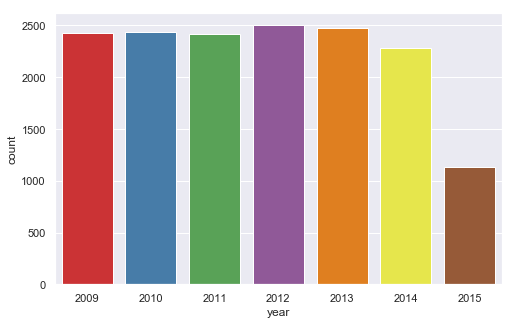

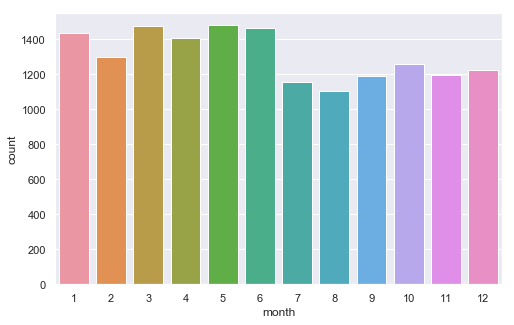

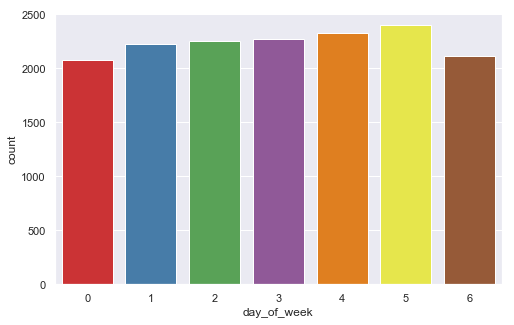

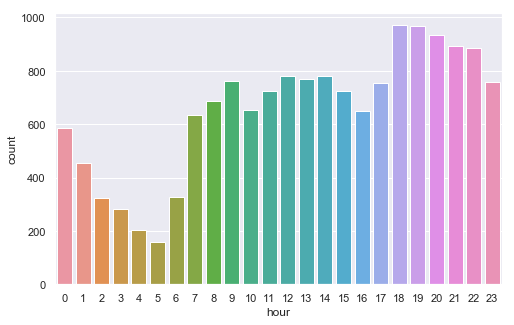

In [86]:
plt.figure(figsize=(8,5))
sns.countplot(cab_train['year'])

plt.figure(figsize=(8,5))
sns.countplot(cab_train['month'])

plt.figure(figsize=(8,5))
sns.countplot(cab_train['day_of_week'])

plt.figure(figsize=(8,5))
sns.countplot(cab_train['hour'])

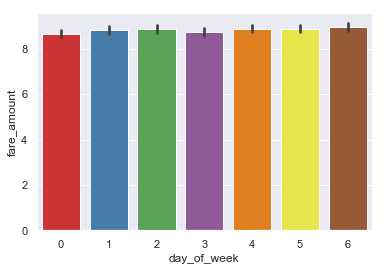

In [87]:
sns.barplot(x='day_of_week',y='fare_amount',data=cab_train)

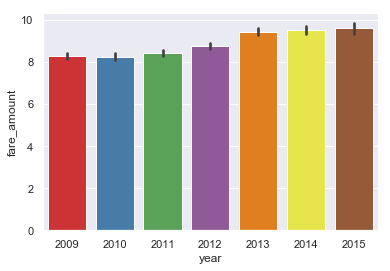

In [88]:
sns.barplot(x='year',y='fare_amount',data=cab_train)

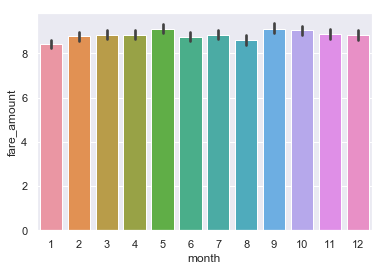

In [89]:
sns.barplot(x='month',y='fare_amount',data=cab_train)

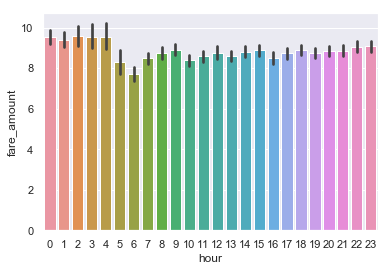

In [90]:
sns.barplot(x='hour',y='fare_amount',data=cab_train)

In [91]:
#2 Now we will use month,day_of_week,hour to derive new features like sessions in a day,seasons in a year,week:weekend/weekday

In [92]:
def f(x):
    ''' for sessions in a day using hour column '''
    if (x >=5) and (x <= 11):
        return 'morning'
    elif (x >=12) and (x <=16 ):
        return 'afternoon'
    elif (x >= 17) and (x <= 20):
        return'evening'
    elif (x >=21) and (x <= 23) :
        return 'night_PM'
    elif (x >=0) and (x <=4):
        return'night_AM'

In [93]:
def g(x):
    ''' for seasons in a year using month column'''
    if (x >=3) and (x <= 5):
        return 'spring'
    elif (x >=6) and (x <=8 ):
        return 'summer'
    elif (x >= 9) and (x <= 11):
        return'fall'
    elif (x >=12)|(x <= 2) :
        return 'winter'

In [94]:
def h(x):
    ''' for week:weekday/weekend in a day_of_week column '''
    if (x >=0) and (x <= 4):
        return 'weekday'
    elif (x >=5) and (x <=6 ):
        return 'weekend'

In [95]:
cab_train['session'] = cab_train['hour'].apply(f)
cab_test['session'] = cab_test['hour'].apply(f)

In [96]:
cab_train['seasons'] = cab_train['month'].apply(g)
cab_test['seasons'] = cab_test['month'].apply(g)

In [97]:
cab_train['week'] =cab_train['day_of_week'].apply(h)
cab_test['week'] = cab_test['day_of_week'].apply(h)

In [98]:
cab_train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day_of_week,hour,session,seasons,week
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,0,17,evening,summer,weekday
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,1,16,afternoon,winter,weekday
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,3,0,night_AM,summer,weekday
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,5,4,night_AM,spring,weekend
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,1,7,morning,spring,weekday


In [99]:
cab_test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day_of_week,hour,session,seasons,week
0,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,1,13,afternoon,winter,weekday
1,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,1,13,afternoon,winter,weekday
2,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,5,11,morning,fall,weekend
3,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,5,21,night_PM,winter,weekend
4,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,5,21,night_PM,winter,weekend


In [100]:
cab_train=cab_train.drop(['pickup_datetime','year', 'month',
       'day_of_week','hour'],axis=1)
cab_test=cab_test.drop(['pickup_datetime','year', 'month',
       'day_of_week','hour'],axis=1)

In [101]:
cab_train.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'session',
       'seasons', 'week'],
      dtype='object')

In [102]:
cab_test.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'session', 'seasons', 'week'],
      dtype='object')

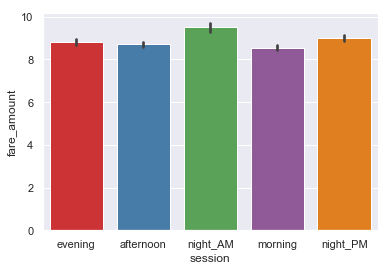

In [103]:
sns.barplot(x='session',y='fare_amount',data=cab_train)

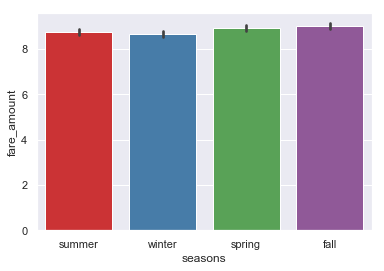

In [104]:
sns.barplot(x='seasons',y='fare_amount',data=cab_train)

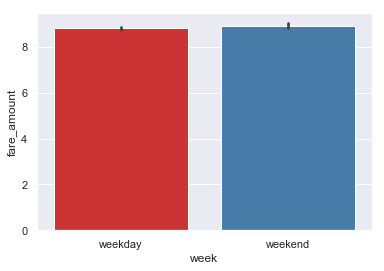

In [105]:
sns.barplot(x='week',y='fare_amount',data=cab_train)

In [106]:
#conclusion
#with the above barplot we can conclude that the fare_amount is highest at night session,and among season the fare_amount is 
#highest during rainfall and avg fare_amount is almost same whether its a week day or weekend

In [107]:
#2.Feature Engineering for passenger_count variable Because models in scikit learn require numerical input,if dataset contains 
#categorical variables then we have to encode them.We will use one hot encoding technique for passenger_count variable.

In [108]:
#dummy variables are created for all the categorical variables

In [109]:
cat_feats=['passenger_count','session','seasons','week']

In [110]:
final_cab_train = pd.get_dummies(cab_train,columns=cat_feats)

In [111]:
final_cab_train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,...,session_evening,session_morning,session_night_AM,session_night_PM,seasons_fall,seasons_spring,seasons_summer,seasons_winter,week_weekday,week_weekend
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,5.7,-73.982738,40.761270,-73.991242,40.750562,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [112]:
final_cab_train.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count_1',
       'passenger_count_2', 'passenger_count_3', 'passenger_count_4',
       'passenger_count_5', 'passenger_count_6', 'session_afternoon',
       'session_evening', 'session_morning', 'session_night_AM',
       'session_night_PM', 'seasons_fall', 'seasons_spring', 'seasons_summer',
       'seasons_winter', 'week_weekday', 'week_weekend'],
      dtype='object')

In [113]:
final_cab_test = pd.get_dummies(cab_test,columns=cat_feats)

In [114]:
final_cab_test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,...,session_evening,session_morning,session_night_AM,session_night_PM,seasons_fall,seasons_spring,seasons_summer,seasons_winter,week_weekday,week_weekend
0,-73.973320,40.763805,-73.981430,40.743835,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,-73.986862,40.719383,-73.998886,40.739201,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,-73.982524,40.751260,-73.979654,40.746139,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3,-73.981160,40.767807,-73.990448,40.751635,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
4,-73.966046,40.789775,-73.988565,40.744427,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1


In [115]:
final_cab_test.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count_1', 'passenger_count_2',
       'passenger_count_3', 'passenger_count_4', 'passenger_count_5',
       'passenger_count_6', 'session_afternoon', 'session_evening',
       'session_morning', 'session_night_AM', 'session_night_PM',
       'seasons_fall', 'seasons_spring', 'seasons_summer', 'seasons_winter',
       'week_weekday', 'week_weekend'],
      dtype='object')

In [116]:
#3.Feature Engineering for latitude and longitude variable As we have latitude and longitude data for pickup and dropoff, we 
#will find the distance the cab travelled from pickup and dropoff location.

In [117]:
#pip install geopy

In [118]:
# Calculate distance the cab travelled from pickup and dropoff location using great_circle from geopy library
data = [final_cab_train, final_cab_test]
for i in data:
    i['great_circle']=i.apply(lambda x: great_circle((x['pickup_latitude'],x['pickup_longitude']), (x['dropoff_latitude'],   x['dropoff_longitude'])).miles, axis=1)
    i['geodesic']=i.apply(lambda x: geodesic((x['pickup_latitude'],x['pickup_longitude']), (x['dropoff_latitude'],   x['dropoff_longitude'])).miles, axis=1)

In [119]:
final_cab_train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,...,session_night_AM,session_night_PM,seasons_fall,seasons_spring,seasons_summer,seasons_winter,week_weekday,week_weekend,great_circle,geodesic
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0.640488,0.639764
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,0,0,0,0,...,0,0,0,0,0,1,1,0,5.250677,5.246511
2,5.7,-73.982738,40.761270,-73.991242,40.750562,0,1,0,0,0,...,1,0,0,0,1,0,1,0,0.863412,0.863167
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,0,0,0,0,...,1,0,0,1,0,0,0,1,1.739388,1.737223
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1.242220,1.241710


In [120]:
final_cab_test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,...,session_night_AM,session_night_PM,seasons_fall,seasons_spring,seasons_summer,seasons_winter,week_weekday,week_weekend,great_circle,geodesic
0,-73.973320,40.763805,-73.981430,40.743835,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1.443609,1.442197
1,-73.986862,40.719383,-73.998886,40.739201,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1.507047,1.506080
2,-73.982524,40.751260,-73.979654,40.746139,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0.384398,0.384120
3,-73.981160,40.767807,-73.990448,40.751635,1,0,0,0,0,0,...,0,1,0,0,0,1,0,1,1.218531,1.217683
4,-73.966046,40.789775,-73.988565,40.744427,1,0,0,0,0,0,...,0,1,0,0,0,1,0,1,3.347519,3.344737


In [121]:
final_cab_train.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count_1',
       'passenger_count_2', 'passenger_count_3', 'passenger_count_4',
       'passenger_count_5', 'passenger_count_6', 'session_afternoon',
       'session_evening', 'session_morning', 'session_night_AM',
       'session_night_PM', 'seasons_fall', 'seasons_spring', 'seasons_summer',
       'seasons_winter', 'week_weekday', 'week_weekend', 'great_circle',
       'geodesic'],
      dtype='object')

In [122]:
final_cab_test.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count_1', 'passenger_count_2',
       'passenger_count_3', 'passenger_count_4', 'passenger_count_5',
       'passenger_count_6', 'session_afternoon', 'session_evening',
       'session_morning', 'session_night_AM', 'session_night_PM',
       'seasons_fall', 'seasons_spring', 'seasons_summer', 'seasons_winter',
       'week_weekday', 'week_weekend', 'great_circle', 'geodesic'],
      dtype='object')

In [123]:
pd.DataFrame(final_cab_train.isna().sum())

,0
fare_amount,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count_1,0
passenger_count_2,0
passenger_count_3,0
passenger_count_4,0
passenger_count_5,0


In [124]:
#We will remove the variables which were used to feature engineer new variables

In [125]:
final_cab_train=final_cab_train.drop(['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude','dropoff_latitude','great_circle'],axis=1)
final_cab_test=final_cab_test.drop(['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude','great_circle' ],axis=1)

In [126]:
final_cab_train.head()

,fare_amount,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,session_afternoon,session_evening,session_morning,session_night_AM,session_night_PM,seasons_fall,seasons_spring,seasons_summer,seasons_winter,week_weekday,week_weekend,geodesic
0,4.5,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0.639764
1,16.9,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,5.246511
2,5.7,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0.863167
3,7.7,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1.737223
4,5.3,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1.241710


In [127]:
final_cab_test.head()

,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,session_afternoon,session_evening,session_morning,session_night_AM,session_night_PM,seasons_fall,seasons_spring,seasons_summer,seasons_winter,week_weekday,week_weekend,geodesic
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1.442197
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1.506080
2,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0.384120
3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1.217683
4,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,3.344737


In [128]:
final_cab_train.columns

Index(['fare_amount', 'passenger_count_1', 'passenger_count_2',
       'passenger_count_3', 'passenger_count_4', 'passenger_count_5',
       'passenger_count_6', 'session_afternoon', 'session_evening',
       'session_morning', 'session_night_AM', 'session_night_PM',
       'seasons_fall', 'seasons_spring', 'seasons_summer', 'seasons_winter',
       'week_weekday', 'week_weekend', 'geodesic'],
      dtype='object')

In [129]:
final_cab_test.columns

Index(['passenger_count_1', 'passenger_count_2', 'passenger_count_3',
       'passenger_count_4', 'passenger_count_5', 'passenger_count_6',
       'session_afternoon', 'session_evening', 'session_morning',
       'session_night_AM', 'session_night_PM', 'seasons_fall',
       'seasons_spring', 'seasons_summer', 'seasons_winter', 'week_weekday',
       'week_weekend', 'geodesic'],
      dtype='object')

In [130]:
#outlier analysis for geodesic

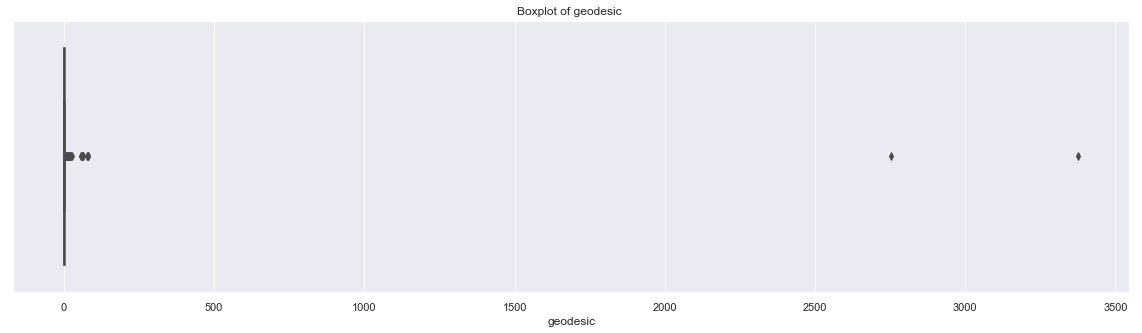

In [131]:
plt.figure(figsize=(20,5)) 
sns.boxplot(x=final_cab_train['geodesic'],data=final_cab_train,orient='h')
plt.title('Boxplot of geodesic ')
plt.show()

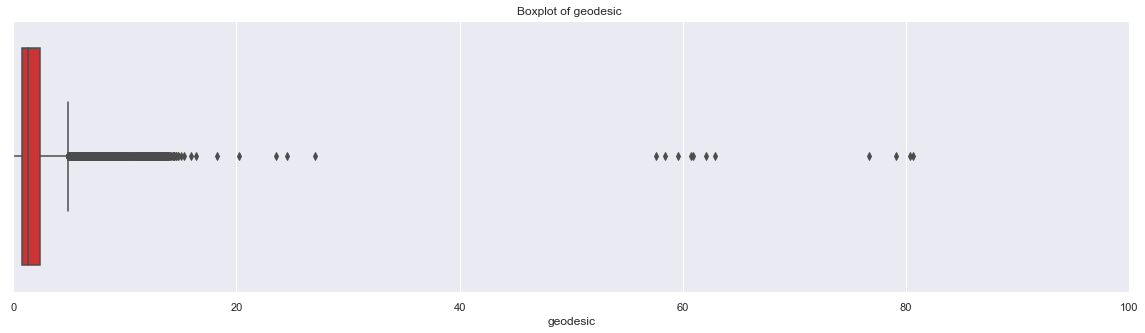

In [132]:
plt.figure(figsize=(20,5)) 
plt.xlim(0,100)
sns.boxplot(x=final_cab_train['geodesic'],data=final_cab_train,orient='h')
plt.title('Boxplot of geodesic ')
plt.show()

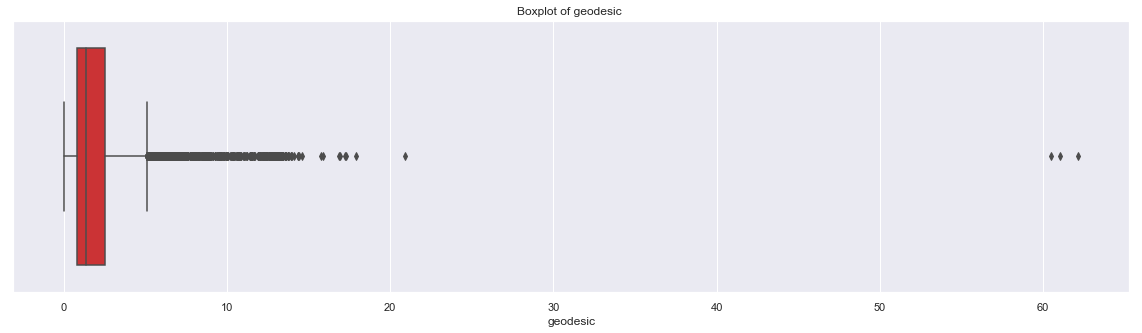

In [133]:
plt.figure(figsize=(20,5)) 
sns.boxplot(x=final_cab_test['geodesic'],data=final_cab_test,orient='h')
plt.title('Boxplot of geodesic ')
plt.show()

In [134]:
def outlier_treatment(col):
    ''' calculating outlier indices and replacing them with NA  '''
    #Extract quartiles
    q75, q25 = np.percentile(final_cab_train[col], [75 ,25])
    print(q75,q25) 
    #Calculate IQR
    iqr = q75 - q25
    #Calculate inner and outer fence
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    print(minimum,maximum)
     #Replace with NA
    final_cab_train.loc[final_cab_train[col] < minimum,col] = np.nan
    final_cab_train.loc[final_cab_train[col] > maximum,col] = np.nan

In [135]:
outlier_treatment('geodesic')

2.4253596312061476 0.7815138509168493
-1.6842548195170979 4.891128301640094


In [136]:
pd.DataFrame(final_cab_train.isnull().sum())

,0
fare_amount,0
passenger_count_1,0
passenger_count_2,0
passenger_count_3,0
passenger_count_4,0
passenger_count_5,0
passenger_count_6,0
session_afternoon,0
session_evening,0
session_morning,0


In [137]:
final_cab_train['geodesic'] = final_cab_train['geodesic'].fillna(final_cab_train['geodesic'].median())

In [138]:
pd.DataFrame(final_cab_train.isnull().sum())

,0
fare_amount,0
passenger_count_1,0
passenger_count_2,0
passenger_count_3,0
passenger_count_4,0
passenger_count_5,0
passenger_count_6,0
session_afternoon,0
session_evening,0
session_morning,0


In [139]:
#Feature Selection
#1.Correlation Analysis 
#Linear models assume feature independence.And if features are correlated that could introduce bias into our models.

In [140]:
#We will plot a Heatmap of correlation whereas, correlation measures how strongly 2 quantities are related to each other.

In [141]:
final_cab_train.dtypes

fare_amount          float64
passenger_count_1      uint8
passenger_count_2      uint8
passenger_count_3      uint8
passenger_count_4      uint8
passenger_count_5      uint8
passenger_count_6      uint8
session_afternoon      uint8
session_evening        uint8
session_morning        uint8
session_night_AM       uint8
session_night_PM       uint8
seasons_fall           uint8
seasons_spring         uint8
seasons_summer         uint8
seasons_winter         uint8
week_weekday           uint8
week_weekend           uint8
geodesic             float64
dtype: object

In [142]:
cat_var=['passenger_count_1', 'passenger_count_2','passenger_count_3', 'passenger_count_4', 'passenger_count_5',
       'passenger_count_6', 'session_afternoon', 'session_evening','session_morning', 'session_night_AM', 'session_night_PM',
       'seasons_fall', 'seasons_spring', 'seasons_summer', 'seasons_winter','week_weekday', 'week_weekend']
num_var=['fare_amount','geodesic']
#final_cab_train[cat_var]=final_cab_train[cat_var].apply(lambda x: x.astype('category') )
#final_cab_test[cat_var]=final_cab_test[cat_var].apply(lambda x: x.astype('category') ) 

In [143]:
#num_var1=['fare_amount','geodesic']

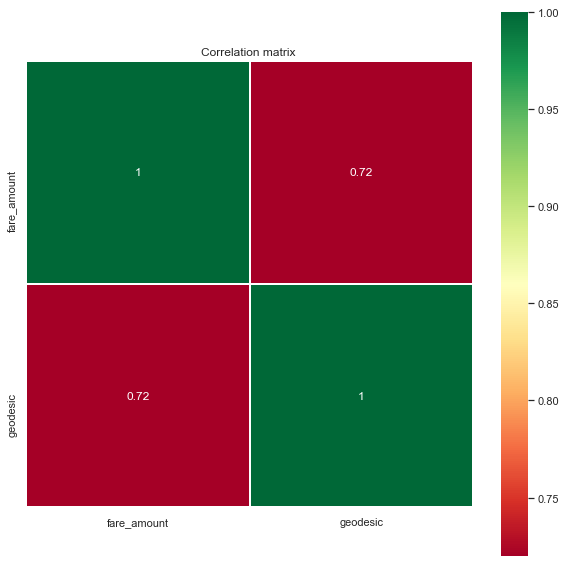

In [144]:
# heatmap using correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(final_cab_train[num_var].corr(), square=True, cmap='RdYlGn',linewidths=0.5,linecolor='w',annot=True)
plt.title('Correlation matrix ')
plt.show()

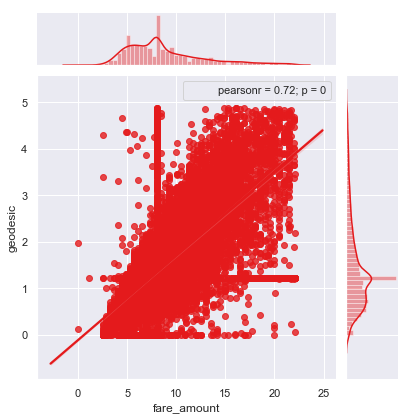

In [145]:
sns.jointplot(x='fare_amount',y='geodesic',data=final_cab_train,kind = 'reg').annotate(stats.pearsonr)
plt.show()

In [146]:
final_cab_train.columns

Index(['fare_amount', 'passenger_count_1', 'passenger_count_2',
       'passenger_count_3', 'passenger_count_4', 'passenger_count_5',
       'passenger_count_6', 'session_afternoon', 'session_evening',
       'session_morning', 'session_night_AM', 'session_night_PM',
       'seasons_fall', 'seasons_spring', 'seasons_summer', 'seasons_winter',
       'week_weekday', 'week_weekend', 'geodesic'],
      dtype='object')

In [147]:
final_cab_train.dtypes

fare_amount          float64
passenger_count_1      uint8
passenger_count_2      uint8
passenger_count_3      uint8
passenger_count_4      uint8
passenger_count_5      uint8
passenger_count_6      uint8
session_afternoon      uint8
session_evening        uint8
session_morning        uint8
session_night_AM       uint8
session_night_PM       uint8
seasons_fall           uint8
seasons_spring         uint8
seasons_summer         uint8
seasons_winter         uint8
week_weekday           uint8
week_weekend           uint8
geodesic             float64
dtype: object

In [148]:
#Chi-square test of Independence for Categorical Variables/Features
#Hypothesis testing :Null Hypothesis: 2 variables are independent.Alternate Hypothesis: 2 variables are not independent.
#If p-value is less than 0.05 then we reject the null hypothesis saying that 2 variables are dependent.And if p-value is greater
#than 0.05 then we accept the null hypothesis saying that 2 variables are independent.There should be no dependencies between 
#Independent variables.So we will remove that variable whose p-value with other variable is low than 0.05.
#And we will keep that variable whose p-value with other variable is high than 0.05

In [149]:
#loop for chi square values
for i in cat_var:
    for j in cat_var:
        if(i != j):
            chi2, p, dof, ex = chi2_contingency(pd.crosstab(final_cab_train[i],final_cab_train[j]))
            if(p < 0.05):
                print(i,"and",j,"are dependent on each other with",p,'----Remove')
            else:
                print(i,"and",j,"are independent on each other with",p,'----Keep')

passenger_count_1 and passenger_count_2 are dependent on each other with 0.0 ----Remove
passenger_count_1 and passenger_count_3 are dependent on each other with 0.0 ----Remove
passenger_count_1 and passenger_count_4 are dependent on each other with 1.2938478999562268e-172 ----Remove
passenger_count_1 and passenger_count_5 are dependent on each other with 0.0 ----Remove
passenger_count_1 and passenger_count_6 are dependent on each other with 1.6124126498910076e-159 ----Remove
passenger_count_1 and session_afternoon are independent on each other with 0.7751525423722333 ----Keep
passenger_count_1 and session_evening are dependent on each other with 0.010892692656104139 ----Remove
passenger_count_1 and session_morning are dependent on each other with 1.5339245877509721e-21 ----Remove
passenger_count_1 and session_night_AM are dependent on each other with 0.00011476650575622732 ----Remove
passenger_count_1 and session_night_PM are dependent on each other with 5.665835349469207e-06 ----Remov

passenger_count_6 and session_evening are independent on each other with 0.4929671888515381 ----Keep
passenger_count_6 and session_morning are independent on each other with 0.6789092409388786 ----Keep
passenger_count_6 and session_night_AM are independent on each other with 0.7950537357994645 ----Keep
passenger_count_6 and session_night_PM are independent on each other with 0.3056030866729533 ----Keep
passenger_count_6 and seasons_fall are independent on each other with 0.46954469606074956 ----Keep
passenger_count_6 and seasons_spring are independent on each other with 0.9134042025646396 ----Keep
passenger_count_6 and seasons_summer are independent on each other with 0.9686585692721711 ----Keep
passenger_count_6 and seasons_winter are independent on each other with 0.43748726725715625 ----Keep
passenger_count_6 and week_weekday are independent on each other with 0.7242486485246877 ----Keep
passenger_count_6 and week_weekend are independent on each other with 0.7242486485246877 ----Kee

session_night_PM and seasons_fall are independent on each other with 0.8419405008228598 ----Keep
session_night_PM and seasons_spring are independent on each other with 0.6585449258973594 ----Keep
session_night_PM and seasons_summer are independent on each other with 0.28255304826093974 ----Keep
session_night_PM and seasons_winter are independent on each other with 0.7243582080792559 ----Keep
session_night_PM and week_weekday are independent on each other with 0.09696100459957858 ----Keep
session_night_PM and week_weekend are independent on each other with 0.09696100459957858 ----Keep
seasons_fall and passenger_count_1 are independent on each other with 0.0728500162581326 ----Keep
seasons_fall and passenger_count_2 are independent on each other with 0.07771351303182084 ----Keep
seasons_fall and passenger_count_3 are independent on each other with 0.6644678154541708 ----Keep
seasons_fall and passenger_count_4 are independent on each other with 0.7105764289373527 ----Keep
seasons_fall and

week_weekend and passenger_count_4 are dependent on each other with 5.717044951433781e-06 ----Remove
week_weekend and passenger_count_5 are independent on each other with 0.9210162327189501 ----Keep
week_weekend and passenger_count_6 are independent on each other with 0.7242486485246877 ----Keep
week_weekend and session_afternoon are independent on each other with 0.2608890734421883 ----Keep
week_weekend and session_evening are dependent on each other with 3.398367698426992e-06 ----Remove
week_weekend and session_morning are dependent on each other with 1.5613152603053653e-38 ----Remove
week_weekend and session_night_AM are dependent on each other with 4.064518247992343e-127 ----Remove
week_weekend and session_night_PM are independent on each other with 0.09696100459957858 ----Keep
week_weekend and seasons_fall are independent on each other with 0.18185637406234764 ----Keep
week_weekend and seasons_spring are independent on each other with 0.8024367504731668 ----Keep
week_weekend and s

In [150]:
#Conclusion.All the categorical datas are independent to each other hence no need to drop any variables

In [151]:
final_cab_train.columns

Index(['fare_amount', 'passenger_count_1', 'passenger_count_2',
       'passenger_count_3', 'passenger_count_4', 'passenger_count_5',
       'passenger_count_6', 'session_afternoon', 'session_evening',
       'session_morning', 'session_night_AM', 'session_night_PM',
       'seasons_fall', 'seasons_spring', 'seasons_summer', 'seasons_winter',
       'week_weekday', 'week_weekend', 'geodesic'],
      dtype='object')

In [152]:
#Feature Scaling with normalization

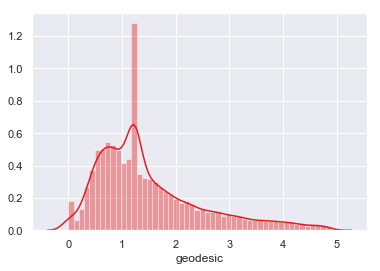

In [153]:
sns.distplot(final_cab_train['geodesic'],bins=50)

In [154]:
#Normalization
final_cab_train['geodesic'] = (final_cab_train['geodesic'] - min(final_cab_train['geodesic']))/(max(final_cab_train['geodesic']) - min(final_cab_train['geodesic']))
final_cab_test['geodesic'] = (final_cab_test['geodesic'] - min(final_cab_test['geodesic']))/(max(final_cab_test['geodesic']) - min(final_cab_test['geodesic']))

In [155]:
final_cab_train['geodesic'].var()

0.04151214214402438

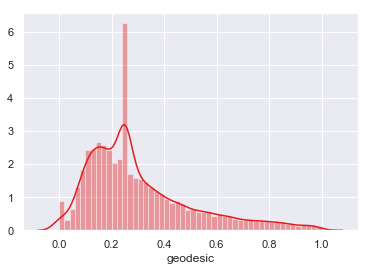

In [156]:
sns.distplot(final_cab_train['geodesic'],bins=50)

In [157]:
#MODELLING PART

In [158]:
#Splitting train into train and validation subsets
#X_train y_train--are train subset X_test y_test--are validation subset

In [159]:
from sklearn.model_selection import train_test_split

In [160]:
X = final_cab_train.drop('fare_amount',axis=1)
y = final_cab_train['fare_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [161]:
def scores(y, y_):
    print('r square  ', metrics.r2_score(y, y_))
    print('Adjusted r square:{}'.format(1 - (1-metrics.r2_score(y, y_))*(len(y)-1)/(len(y)-X_train.shape[1]-1)))
    print('MAPE:{}'.format(np.mean(np.ma.masked_invalid(np.abs((y - y_) / y))*100)))
    print('MSE:', metrics.mean_squared_error(y, y_))

In [162]:
def test_scores(model):
    print('<<<------------------- Training Data Score --------------------->')
    print()
    #Predicting result on Training data
    y_pred = model.predict(X_train)
    scores(y_train,y_pred)
    print('<<<------------------- Test Data Score --------------------->')
    print()
    # Evaluating on Test Set
    y_pred = model.predict(X_test)
    scores(y_test,y_pred)

In [163]:
# Hyperparameter Optimization

In [164]:
# Setup the parameters and distributions to sample from: 
param_dist = {'copy_X':[True, False],
          'fit_intercept':[True,False]}
# Instantiate a Linear reg classifier: reg
reg = LinearRegression()

# Instantiate the gridSearchCV object: reg_cv
reg_cv = GridSearchCV(reg, param_dist, cv=5,scoring='r2')

# Fit it to the data
reg_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision linear reg Parameters: {}".format(reg_cv.best_params_))
print("Best score is {}".format(reg_cv.best_score_))

Tuned Decision linear reg Parameters: {'copy_X': True, 'fit_intercept': False}
Best score is 0.5199961309129493


In [165]:
reg = LinearRegression(copy_X= True , fit_intercept= False)
#training the model
reg.fit(X_train,y_train)

#predicting on test
pred_LR = reg.predict(X_test)

In [166]:
# The coefficients
print('Coefficients of linear regression: \n', reg.coef_)

Coefficients of linear regression: 
 [ 2.10104804e+12  2.10104804e+12  2.10104804e+12  2.10104804e+12
  2.10104804e+12  2.10104804e+12  1.22636645e+13  1.22636645e+13
  1.22636645e+13  1.22636645e+13  1.22636645e+13  9.37089764e+12
  9.37089764e+12  9.37089764e+12  9.37089764e+12 -2.37356101e+13
 -2.37356101e+13  1.40647415e+01]


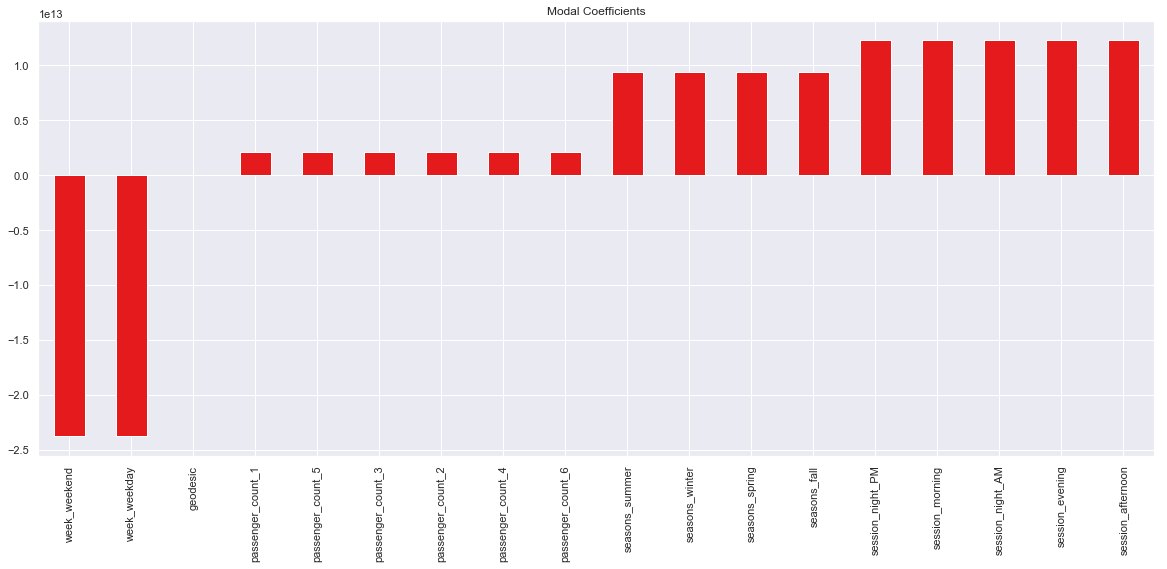

In [167]:
#checking the magnitude of coefficients graphically
predictors = X_train.columns
coef = pd.Series(reg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients', figsize= (20,8))

In [168]:
from sklearn.model_selection import cross_val_score
# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg,X,y,cv=5,scoring='neg_mean_squared_error')

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[-7.21501423 -7.26636985 -7.23730696 -7.8003281  -8.04261163]
Average 5-Fold CV Score: -7.512326153320194


In [169]:
#lets reduce the magnitude of coefficients that is high in our model #REGULARISATION

In [170]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {'alpha':np.logspace(-4, 0, 50),
          'normalize':[True,False],
             'max_iter':range(500,5000,500)}
# Instantiate a Decision ridge classifier: ridge
ridge = Ridge()

# Instantiate the gridSearchCV object: ridge_cv
ridge_cv = GridSearchCV(ridge, param_dist, cv=5,scoring='r2')

# Fit it to the data
ridge_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision ridge Parameters: {}".format(ridge_cv.best_params_))
print("Best score is {}".format(ridge_cv.best_score_))

Tuned Decision ridge Parameters: {'alpha': 0.0009540954763499944, 'max_iter': 500, 'normalize': True}
Best score is 0.5202123253724414


In [171]:
#Training Ridge Regression Model
ridge = Ridge(alpha=0.0009540954763499944,max_iter= 500, normalize=True)
ridge.fit(X_train,y_train)
pred_ridge = ridge.predict(X_test)

In [172]:
# The coefficients
print('Coefficients of ridge: \n', ridge.coef_)

Coefficients of ridge: 
 [-5.85185269e-02 -1.26572567e-02  1.53407728e-02  9.61249971e-02
 -2.35487692e-02  6.75135875e-01  2.16478549e-01  4.39246415e-02
 -9.42572792e-02 -3.86570559e-02 -1.86472551e-01  1.29613641e-01
  2.37430401e-02 -9.38441877e-02 -5.82643483e-02  9.14204250e-02
 -9.14204250e-02  1.40470050e+01]


In [173]:
#checking the magnitude of coefficients

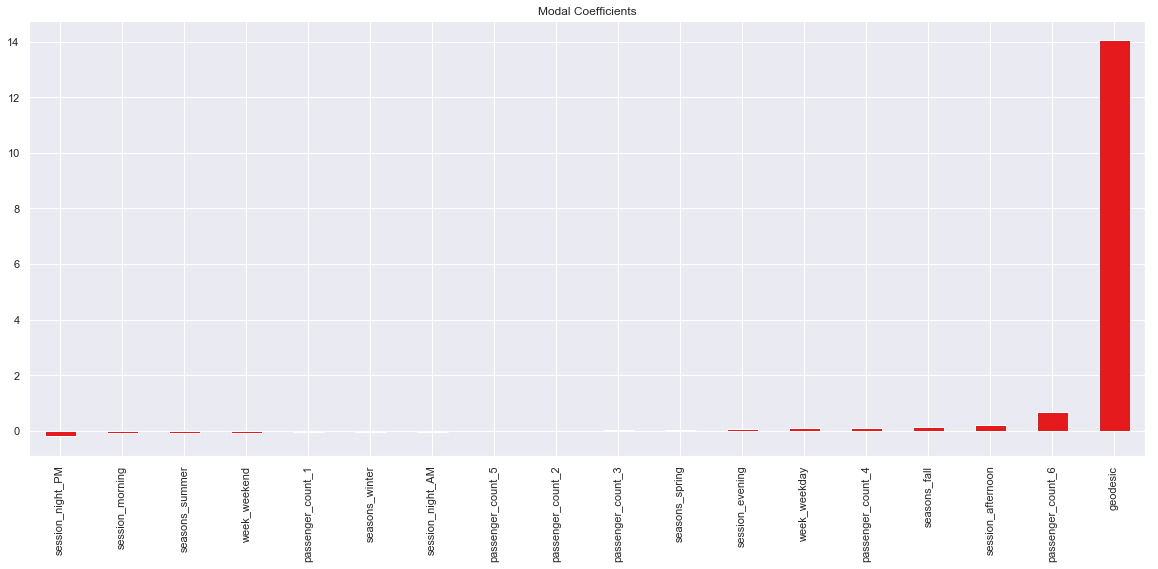

In [174]:
predictors = X_train.columns
coef = pd.Series(ridge.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients',figsize=(20,8))

In [175]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {'alpha':np.logspace(-4, 0, 50),
          'normalize':[True,False],
             'max_iter':range(500,5000,500)}
# Instantiate a Decision lasso classifier: lasso
lasso = Lasso()

# Instantiate the gridSearchCV object: lasso_cv
lasso_cv = GridSearchCV(lasso, param_dist, cv=5,scoring='r2')

# Fit it to the data
lasso_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision lasso Parameters: {}".format(lasso_cv.best_params_))
print("Best score is {}".format(lasso_cv.best_score_))

Tuned Decision lasso Parameters: {'alpha': 0.0020235896477251557, 'max_iter': 500, 'normalize': False}
Best score is 0.5202477706005241


In [176]:
#Training Lasso Regression Model
lasso = Lasso(alpha=0.0020235896477251557, max_iter= 500, normalize= False)
lasso.fit(X_train,y_train)
pred_LASSO = lasso.predict(X_test)

In [177]:
# The coefficients
print('Coefficients of lasso: \n', lasso.coef_)

Coefficients of lasso: 
 [-5.20173068e-02 -0.00000000e+00  0.00000000e+00  4.21259179e-04
 -0.00000000e+00  5.74264128e-01  2.47938216e-01  7.60923502e-02
 -4.59388280e-02  0.00000000e+00 -1.32812689e-01  1.68478268e-01
  6.46989567e-02 -3.67612757e-02 -2.80516316e-03  1.69203715e-01
 -6.43917383e-17  1.40093132e+01]


In [178]:
#checking the magnitude of coefficients

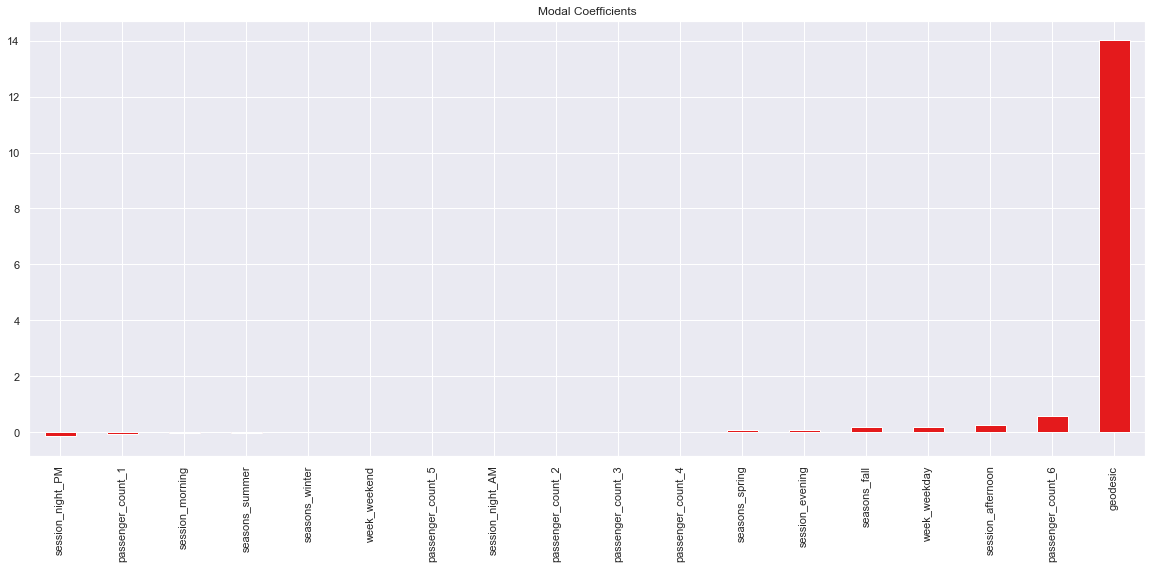

In [179]:
predictors = X_train.columns
coef = pd.Series(lasso.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients',figsize=(20,8))

In [180]:
#scatter plot for actual value and predicted value

Text(0, 0.5, 'Predicted Y')

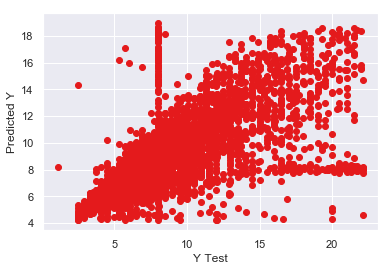

In [181]:
plt.scatter(y_test,pred_LR)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Text(0, 0.5, 'Predicted Y')

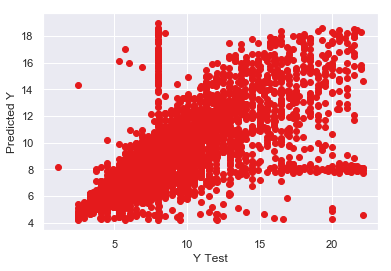

In [182]:
plt.scatter(y_test,pred_ridge)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Text(0, 0.5, 'Predicted Y')

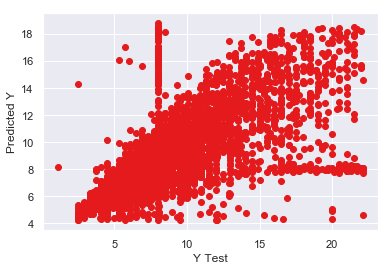

In [183]:
plt.scatter(y_test,pred_LASSO)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

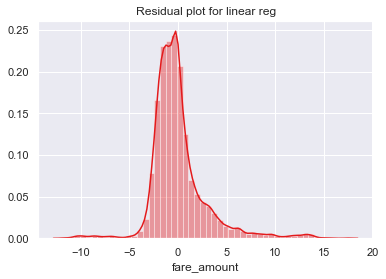

In [184]:
sns.distplot((y_test-pred_LR),bins=50);
#Axis labels and title
plt.title('Residual plot for linear reg');

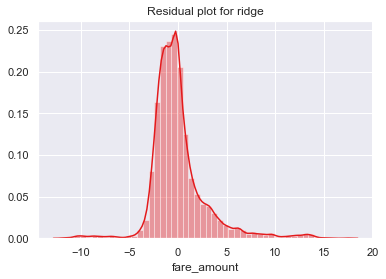

In [185]:
sns.distplot((y_test-pred_ridge),bins=50);
#Axis labels and title
plt.title('Residual plot for ridge');

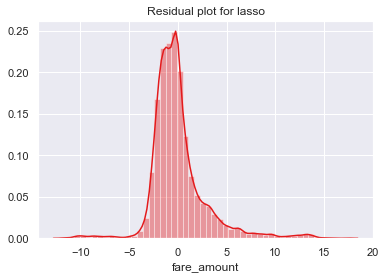

In [186]:
sns.distplot((y_test-pred_LASSO),bins=50);
#Axis labels and title
plt.title('Residual plot for lasso');

In [187]:
#4th algorithm (Decision Tree Regression)

In [188]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {'max_depth': range(2,16,2),
              'min_samples_split': range(2,16,2)}

# Instantiate a Decision Tree classifier: tree
DT = DecisionTreeRegressor()

# Instantiate the gridSearchCV object: tree_cv
DT_cv = GridSearchCV(DT, param_dist, cv=5)

# Fit it to the data
DT_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(DT_cv.best_params_))
print("Best score is {}".format(DT_cv.best_score_))

Tuned Decision Tree Parameters: {'max_depth': 6, 'min_samples_split': 14}
Best score is 0.549080164010327


In [189]:
DT = DecisionTreeRegressor(max_depth= 6, min_samples_split=14)
DT.fit(X_train,y_train)
pred_DT = DT.predict(X_test)

[1.54804554e-04 5.50224623e-04 1.76694650e-03 0.00000000e+00
 0.00000000e+00 1.48082994e-03 5.45135529e-03 8.73066819e-04
 1.75677061e-03 6.96131347e-03 2.99723188e-03 4.88907779e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.77005560e-03
 7.50300376e-04 9.74998193e-01]


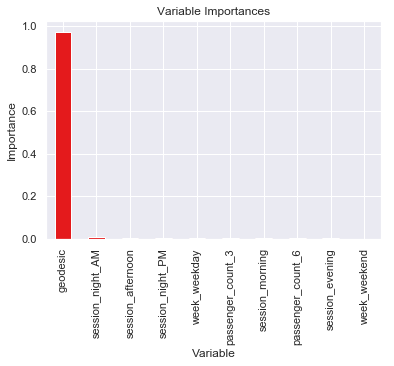

In [190]:
print(DT.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(DT.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='bar')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');
plt.show()

In [191]:
# Create the random grid
random_grid = {'n_estimators': range(100,500,100),
               'max_depth': range(5,20,1),
               'min_samples_leaf':range(2,5,1),
              'max_features':['auto','sqrt','log2'],
              'bootstrap': [True, False],
              'min_samples_split': range(2,5,1)}
# Instantiate a Decision Forest classifier: Forest
RF = RandomForestRegressor()

# Instantiate the gridSearchCV object: Forest_cv
RF_cv = RandomizedSearchCV(RF, random_grid, cv=5)

# Fit it to the data
RF_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Random Forest Parameters: {}".format(RF_cv.best_params_))
print("Best score is {}".format(RF_cv.best_score_))

Tuned Random Forest Parameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 7, 'bootstrap': True}
Best score is 0.5629638447670416


In [192]:
RF = RandomForestRegressor(n_estimators=400,min_samples_split=4,min_samples_leaf=2,max_depth=11,bootstrap=True)
RF.fit(X_train,y_train)
pred_RF = RF.predict(X_test)

In [193]:
pred_RF

array([14.33813728,  5.66816693,  8.82054115, ...,  7.5575661 ,
        6.3413322 , 11.8057228 ])

[0.00729491 0.00590004 0.00445749 0.00207096 0.00449791 0.00302026
 0.00912825 0.00526199 0.00572262 0.00895506 0.00653032 0.00851441
 0.00674426 0.00579288 0.00759316 0.00629327 0.00619711 0.89602509]


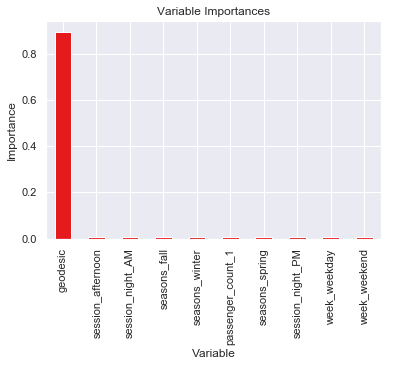

In [194]:
print(RF.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(RF.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='bar')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');
plt.show()

In [195]:
from sklearn.model_selection import cross_val_score
# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(RF,X,y,cv=5,scoring='neg_mean_squared_error')
# Print the 5-fold cross-validation scores
print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[-6.92263757 -6.70173777 -6.92052252 -7.32980623 -7.26668458]
Average 5-Fold CV Score: -7.028277733426552


In [196]:
final_cab_train.dtypes

fare_amount          float64
passenger_count_1      uint8
passenger_count_2      uint8
passenger_count_3      uint8
passenger_count_4      uint8
passenger_count_5      uint8
passenger_count_6      uint8
session_afternoon      uint8
session_evening        uint8
session_morning        uint8
session_night_AM       uint8
session_night_PM       uint8
seasons_fall           uint8
seasons_spring         uint8
seasons_summer         uint8
seasons_winter         uint8
week_weekday           uint8
week_weekend           uint8
geodesic             float64
dtype: object

In [197]:
final_cab_train.head()

,fare_amount,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,session_afternoon,session_evening,session_morning,session_night_AM,session_night_PM,seasons_fall,seasons_spring,seasons_summer,seasons_winter,week_weekday,week_weekend,geodesic
0,4.5,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0.130865
1,16.9,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0.251353
2,5.7,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0.176562
3,7.7,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0.355351
4,5.3,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0.253993


In [198]:
#Improving accuracy using XGBOOST Improve Accuracy

In [199]:
data_dmatrix = xgb.DMatrix(data=X,label=y)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

In [200]:
dtrain,dtest,data_dmatrix

(<xgboost.core.DMatrix at 0x2701b8d4cf8>,
 <xgboost.core.DMatrix at 0x2701b8d4390>)

In [201]:
# Create the random grid
para = {'n_estimators': range(100,500,100),
               'max_depth': range(3,10,1),
        'reg_alpha':np.logspace(-4, 0, 50),
        'subsample': np.arange(0.1,1,0.2),
        'colsample_bytree': np.arange(0.1,1,0.2),
        'colsample_bylevel': np.arange(0.1,1,0.2),
        'colsample_bynode': np.arange(0.1,1,0.2),
       'learning_rate': np.arange(.05, 1, .05)}
# Instantiate a Decision Forest classifier: Forest
XGB = XGBRegressor()

# Instantiate the gridSearchCV object: Forest_cv
xgb_cv = RandomizedSearchCV(XGB, para, cv=5)

# Fit it to the data
xgb_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Xgboost Parameters: {}".format(xgb_cv.best_params_))
print("Best score is {}".format(xgb_cv.best_score_))

[20:59:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:59:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:59:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:59:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:59:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:59:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:59:48] WARNI

[21:02:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Tuned Xgboost Parameters: {'subsample': 0.7000000000000001, 'reg_alpha': 0.0011513953993264468, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1, 'colsample_bytree': 0.5000000000000001, 'colsample_bynode': 0.7000000000000001, 'colsample_bylevel': 0.7000000000000001}
Best score is 0.5577040094784831


In [202]:
XGB = XGBRegressor(subsample=0.9000000000000001,reg_alpha=0.00014563484775012445,n_estimators=200,max_depth=3,learning_rate=0.6500000000000001,colsample_bytree=0.1,colsample_bynode=0.30000000000000004,colsample_bylevel=0.7000000000000001)
XGB.fit(X_train,y_train)
pred_XGB = XGB.predict(X_test)

[21:02:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[6.38399972e-04 8.89386109e-04 5.62681525e-04 1.54879119e-03
 1.29750185e-03 1.01149809e-02 7.83955678e-03 2.57045217e-03
 1.14651425e-02 6.85255323e-03 4.95080929e-03 3.21858795e-03
 1.34548068e-03 2.23818375e-03 1.62513729e-03 4.79800953e-03
 1.36405427e-03 9.36680317e-01]


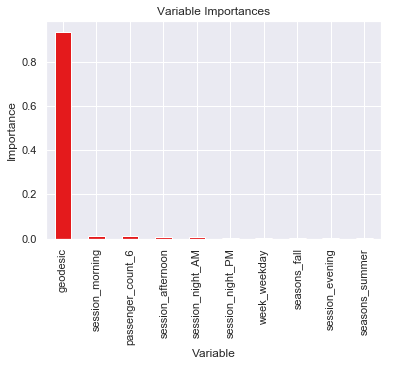

In [203]:
print(XGB.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(XGB.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='bar')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');
plt.show()

In [204]:
test_scores(reg)

<<<------------------- Training Data Score --------------------->

r square   0.5279215099910566
Adjusted r square:0.5271449941526063
MAPE:26.562447105754188
MSE: 7.284855987812086
<<<------------------- Test Data Score --------------------->

r square   0.5063225404165511
Adjusted r square:0.5044237809566148
MAPE:22.10453413859185
MSE: 8.010433912525896


In [205]:
test_scores(ridge)

<<<------------------- Training Data Score --------------------->

r square   0.5279893077123564
Adjusted r square:0.5272129033935062
MAPE:26.4747258532831
MSE: 7.283809770612142
<<<------------------- Test Data Score --------------------->

r square   0.5064736971768451
Adjusted r square:0.5045755190890637
MAPE:21.99565664621809
MSE: 8.007981235752302


In [206]:
test_scores(lasso)

<<<------------------- Training Data Score --------------------->

r square   0.5279411847719716
Adjusted r square:0.5271647012963154
MAPE:26.489395554498824
MSE: 7.284552377398582
<<<------------------- Test Data Score --------------------->

r square   0.5063477729328323
Adjusted r square:0.5044491105210356
MAPE:22.020864219325592
MSE: 8.010024488517987


In [207]:
test_scores(DT)

<<<------------------- Training Data Score --------------------->

r square   0.5851348114292327
Adjusted r square:0.5844524050146962
MAPE:24.720090067699026
MSE: 6.40197174210858
<<<------------------- Test Data Score --------------------->

r square   0.5389634289180455
Adjusted r square:0.5371902113369611
MAPE:21.709094956653203
MSE: 7.480801305017409


In [208]:
test_scores(RF)

<<<------------------- Training Data Score --------------------->

r square   0.6996631299642676
Adjusted r square:0.6991691097083375
MAPE:20.48028997029583
MSE: 4.634633630519993
<<<------------------- Test Data Score --------------------->

r square   0.5355755533449162
Adjusted r square:0.5337893054731659
MAPE:21.532820234431174
MSE: 7.535773135016112


In [209]:
test_scores(XGB)

<<<------------------- Training Data Score --------------------->

r square   0.5846714896504561
Adjusted r square:0.5839883211238828
MAPE:24.74496174540603
MSE: 6.409121469337924
<<<------------------- Test Data Score --------------------->

r square   0.5383765456463522
Adjusted r square:0.5366010708219151
MAPE:21.492738708408343
MSE: 7.490324100865195


In [210]:
#Finalize the best model.Create the model on entire training dataset and save the model for later use

In [211]:
def score(y, y_):
    print('r square  ', metrics.r2_score(y, y_))
    print('Adjusted r square:{}'.format(1 - (1-metrics.r2_score(y, y_))*(len(y)-1)/(len(y)-X_train.shape[1]-1)))
    print('MAPE:{}'.format(np.mean(np.ma.masked_invalid(np.abs((y - y_) / y))*100)))
    print('MSE:', metrics.mean_squared_error(y, y_))

In [212]:
def scores(model):
    print('<<<------------------- Training Data Score --------------------->')
    print()
    #Predicting result on Training data
    y_pred = model.predict(X)
    score(y,y_pred)

In [213]:
final_cab_test.columns

Index(['passenger_count_1', 'passenger_count_2', 'passenger_count_3',
       'passenger_count_4', 'passenger_count_5', 'passenger_count_6',
       'session_afternoon', 'session_evening', 'session_morning',
       'session_night_AM', 'session_night_PM', 'seasons_fall',
       'seasons_spring', 'seasons_summer', 'seasons_winter', 'week_weekday',
       'week_weekend', 'geodesic'],
      dtype='object')

In [214]:
final_cab_train.columns

Index(['fare_amount', 'passenger_count_1', 'passenger_count_2',
       'passenger_count_3', 'passenger_count_4', 'passenger_count_5',
       'passenger_count_6', 'session_afternoon', 'session_evening',
       'session_morning', 'session_night_AM', 'session_night_PM',
       'seasons_fall', 'seasons_spring', 'seasons_summer', 'seasons_winter',
       'week_weekday', 'week_weekend', 'geodesic'],
      dtype='object')

In [215]:
final_cab_test.shape

(9914, 18)

In [216]:
final_cab_train.shape

(15661, 19)

In [217]:
final_cab_test.count()

passenger_count_1    9914
passenger_count_2    9914
passenger_count_3    9914
passenger_count_4    9914
passenger_count_5    9914
passenger_count_6    9914
session_afternoon    9914
session_evening      9914
session_morning      9914
session_night_AM     9914
session_night_PM     9914
seasons_fall         9914
seasons_spring       9914
seasons_summer       9914
seasons_winter       9914
week_weekday         9914
week_weekend         9914
geodesic             9914
dtype: int64

In [218]:
cab=pd.read_csv('test.csv')

In [219]:
test_pickup_datetime=cab['pickup_datetime']

[21:02:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
<<<------------------- Training Data Score --------------------->

r square   0.5746852674350544
Adjusted r square:0.574195837363058
MAPE:23.543908531465544
MSE: 6.664698031743432
[9.8507863e-04 7.1568170e-04 5.8769039e-04 1.4440649e-03 2.3690416e-04
 5.9824656e-03 1.4073114e-02 6.5608224e-04 3.7785918e-03 1.1875037e-03
 1.9786606e-02 1.3071619e-02 4.7880709e-03 4.5555123e-04 1.0093478e-03
 6.3299099e-03 3.3263203e-03 9.2158538e-01]


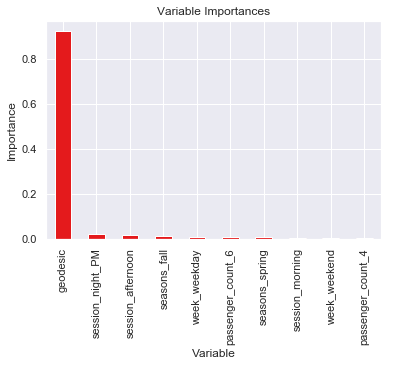

In [220]:
# Instantiate a xgb regressor: xgb
XGB = XGBRegressor(subsample=0.9000000000000001,reg_alpha=0.00014563484775012445,n_estimators=200,max_depth=3,learning_rate=0.6500000000000001,colsample_bytree=0.1,colsample_bynode=0.30000000000000004,colsample_bylevel=0.7000000000000001)
# Fit the regressor to the data
XGB.fit(X,y)
scores(XGB)
print(XGB.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(XGB.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='bar')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');
plt.show()

In [221]:
# Predictions
pred = XGB.predict(final_cab_test)

In [222]:
#save the model

In [223]:
results_wrt_date = pd.DataFrame({"pickup_datetime":test_pickup_datetime,"fare_amount" : pred})
results_wrt_date.to_csv("predictions_xgboost.csv",index=False)

In [225]:
results_wrt_date

,pickup_datetime,fare_amount
0,2015-01-27 13:08:24 UTC,5.675237
1,2015-01-27 13:08:24 UTC,5.675237
2,2011-10-08 11:53:44 UTC,4.512691
3,2012-12-01 21:12:12 UTC,5.045708
4,2012-12-01 21:12:12 UTC,4.323898
...,...,...
9909,2015-05-10 12:37:51 UTC,6.187937
9910,2015-01-12 17:05:51 UTC,5.319065
9911,2015-04-19 20:44:15 UTC,7.625453
9912,2015-01-31 01:05:19 UTC,5.197231


In [ ]:
#for model deployment

In [227]:
from sklearn.externals import joblib

C:\Users\NANINE\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [228]:
# Save the model as a pickle in a file 
joblib.dump(XGB, 'cab_fare_xgboost_model.pkl') 

['cab_fare_xgboost_model.pkl']